In [1]:
from bidict import bidict
from datetime import datetime
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn import datasets, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [133]:
X_y = np.load('../Datasets/skewed_MNIST.npy')
X = X_y[:,:-1]
y = X_y[:,-1]
print(X.shape,y.shape)

(12244, 784) (12244,)


Text(0, 0.5, 'frequency')

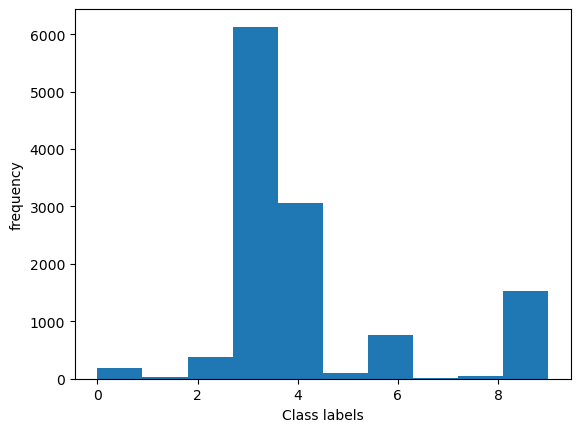

In [113]:
plt.hist(y)
plt.xlabel('Class labels')
plt.ylabel('frequency')

In [114]:
def fuzzy_c_means(data, num_clusters, fuzziness, max_iter=100, tolerance=1e-4):
    # Initialize membership matrix randomly
    membership_matrix = np.random.rand(len(data), num_clusters)
    membership_matrix /= np.sum(membership_matrix, axis=1, keepdims=True)

    for _ in range(max_iter):
        # Update cluster centers
        cluster_centers = np.dot(data.T, membership_matrix**fuzziness) / np.sum(membership_matrix**fuzziness, axis=0, keepdims=True)

        # Calculate distances between data points and cluster centers
        distances = np.linalg.norm(data[:, np.newaxis] - cluster_centers.T, axis=2)
        #print(distances.shape)
        # Update membership matrix
        new_membership_matrix = 1 / np.sum((distances[:, :, np.newaxis] / distances[:, np.newaxis, :])**(2/(fuzziness-1)), axis=2)
        #new_membership_matrix = 1 / new_membership_matrix
        new_membership_matrix /= np.sum(new_membership_matrix, axis=1, keepdims=True)

        # Check for convergence
        #if np.linalg.norm(new_membership_matrix - membership_matrix) < tolerance:
        #    break

        membership_matrix = new_membership_matrix

    return cluster_centers, membership_matrix



In [115]:
data = X
num_clusters = 10
fuzziness = 1.1 # a parameter controlling the degree of fuzziness (usually set between 1.1 and 2)
centers, membership = fuzzy_c_means(data, num_clusters, fuzziness, 1000)

In [116]:
centers[:, 1].shape

(784,)

In [117]:
clusters = np.argmax(membership, axis=1)

In [118]:
cm = confusion_matrix(y, clusters)
cm

array([[  18,    8,    0,    4,    0,   11,   19,  105,    0,   26],
       [   0,    0,    0,   17,    0,    0,    0,    0,    6,    0],
       [  16,    7,    1,   52,    9,    2,    7,  225,   15,   49],
       [1177, 1163,   20, 1183,  124,   17, 1068,   73,   70, 1236],
       [   0,    0,  725,   20,  754,  713,    1,   74,  778,    0],
       [   7,    7,    3,   10,    8,    2,   16,    5,   26,   11],
       [   1,    0,    0,   29,    2,   36,    1,  687,    9,    1],
       [   0,    0,    2,    0,    1,    0,    0,    0,    7,    1],
       [   1,    4,    2,    7,    1,    0,    6,    1,   16,    9],
       [   3,   11,  289,   24,  539,  248,    7,    4,  402,    5]],
      dtype=int64)

Text(0, 0.5, 'frequency')

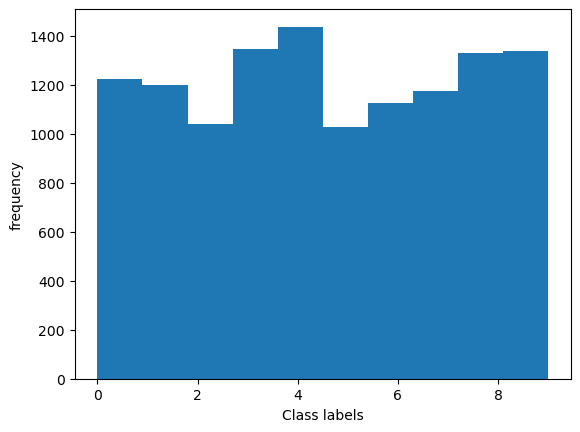

In [119]:
plt.hist(clusters)
plt.xlabel('Class labels')
plt.ylabel('frequency')

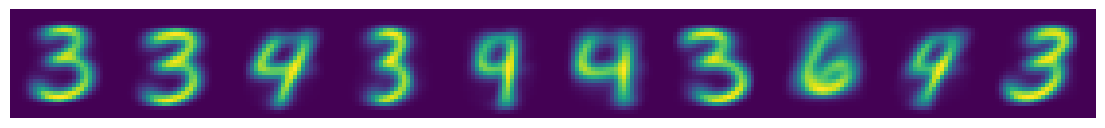

In [120]:
fig, axs = plt.subplots(1,10,figsize=(14,7))
for i in range(10):
    x = centers[:, i].reshape(28,28)
    axs[i].imshow(x)
for ax in axs.flatten():
    ax.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)

In [121]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [123]:
d2 = pca.transform(X)

In [124]:
d2.shape

(12244, 2)

In [125]:
d2[:,0].shape

(12244,)

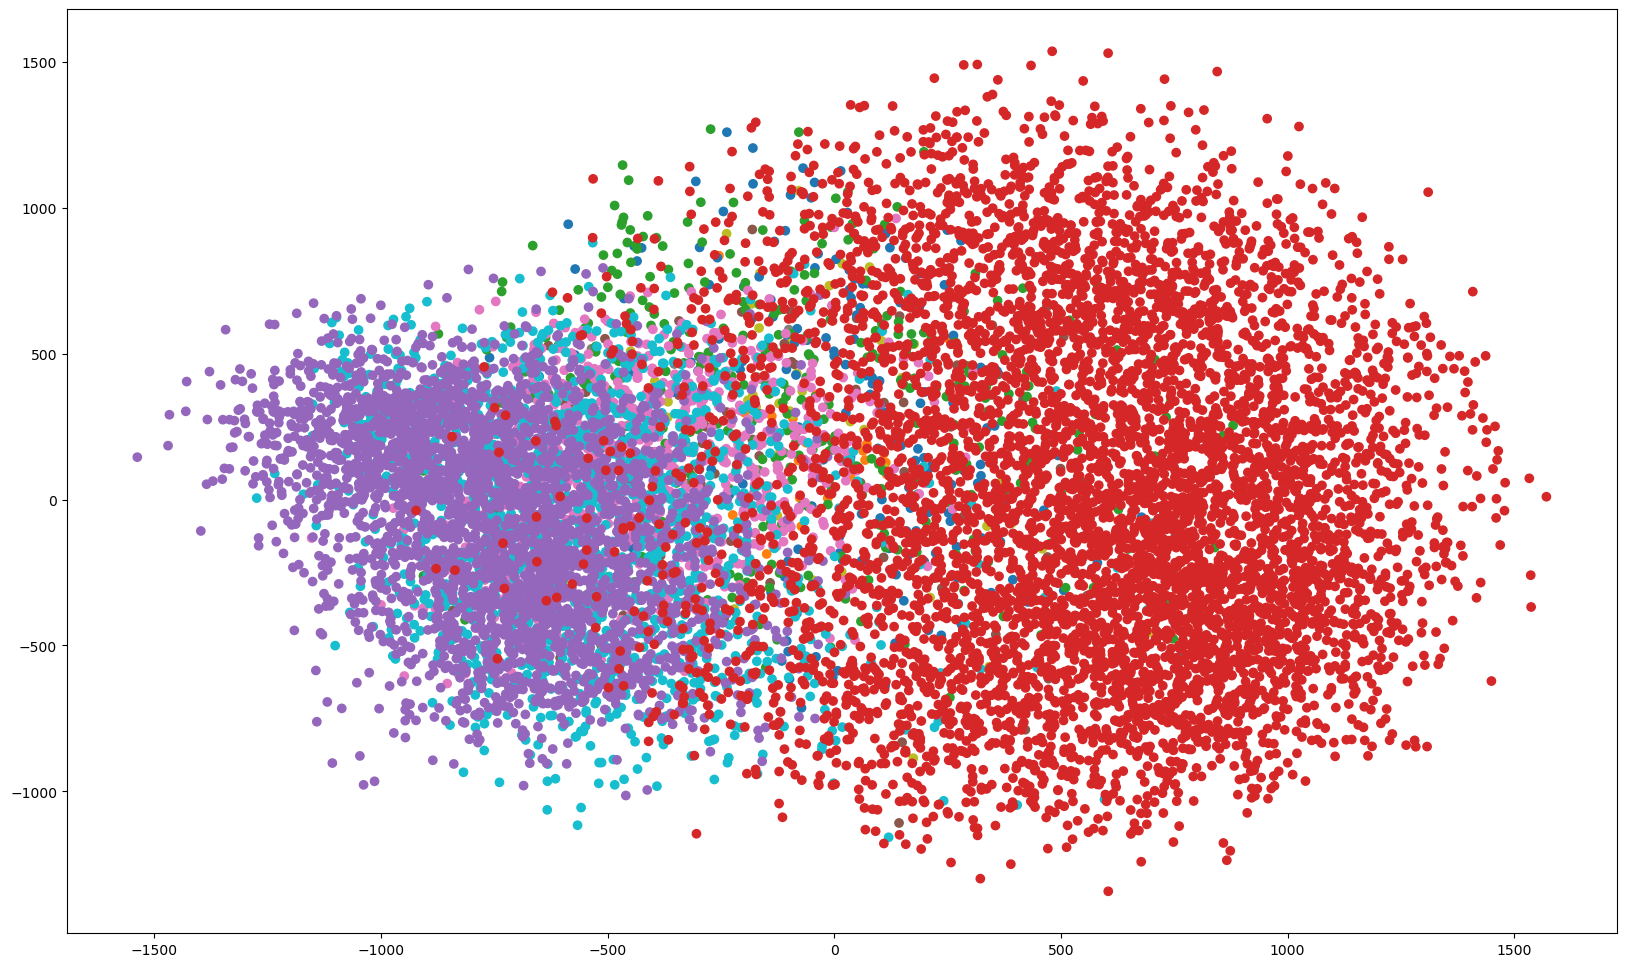

In [126]:
plt.figure(figsize=(20,12))
plt.scatter(d2[:, 0], d2[:,1], c=y, cmap='tab10')

In [127]:
data = d2
num_clusters = 10
fuzziness = 1.1 # a parameter controlling the degree of fuzziness (usually set between 1.1 and 2)
centers, membership = fuzzy_c_means(data, num_clusters, fuzziness, 1000)

In [128]:
membership.shape

(12244, 10)

In [129]:
clusters = np.argmax(membership, axis=1)

In [130]:
cm = confusion_matrix(y, clusters)
cm

array([[  21,   17,    0,    2,    1,   41,    0,   71,    1,   37],
       [   0,    5,    0,    0,    0,    1,    0,    9,    0,    8],
       [  14,   42,   13,    8,   14,   45,    6,   90,    5,  146],
       [ 728,  112,   49, 1209,    7,  741,  935,  970, 1234,  146],
       [  36,  582,  966,    0, 1300,    1,    0,    6,    0,  174],
       [   8,   13,    6,    2,    2,    7,    3,   19,    9,   26],
       [   5,  255,   72,    0,   87,    7,    0,   42,    0,  298],
       [   0,    3,    0,    0,    3,    0,    0,    0,    0,    5],
       [   4,    5,    0,    1,    0,    8,    0,    8,    1,   20],
       [  75,  365,  434,    3,  385,    7,    0,   16,    3,  244]],
      dtype=int64)

Text(0, 0.5, 'frequency')

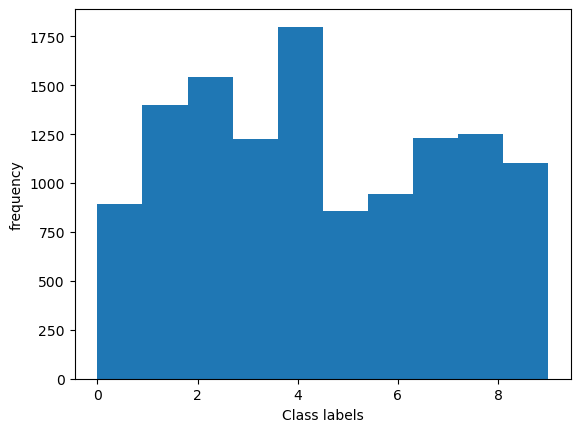

In [131]:
plt.hist(clusters)
plt.xlabel('Class labels')
plt.ylabel('frequency')

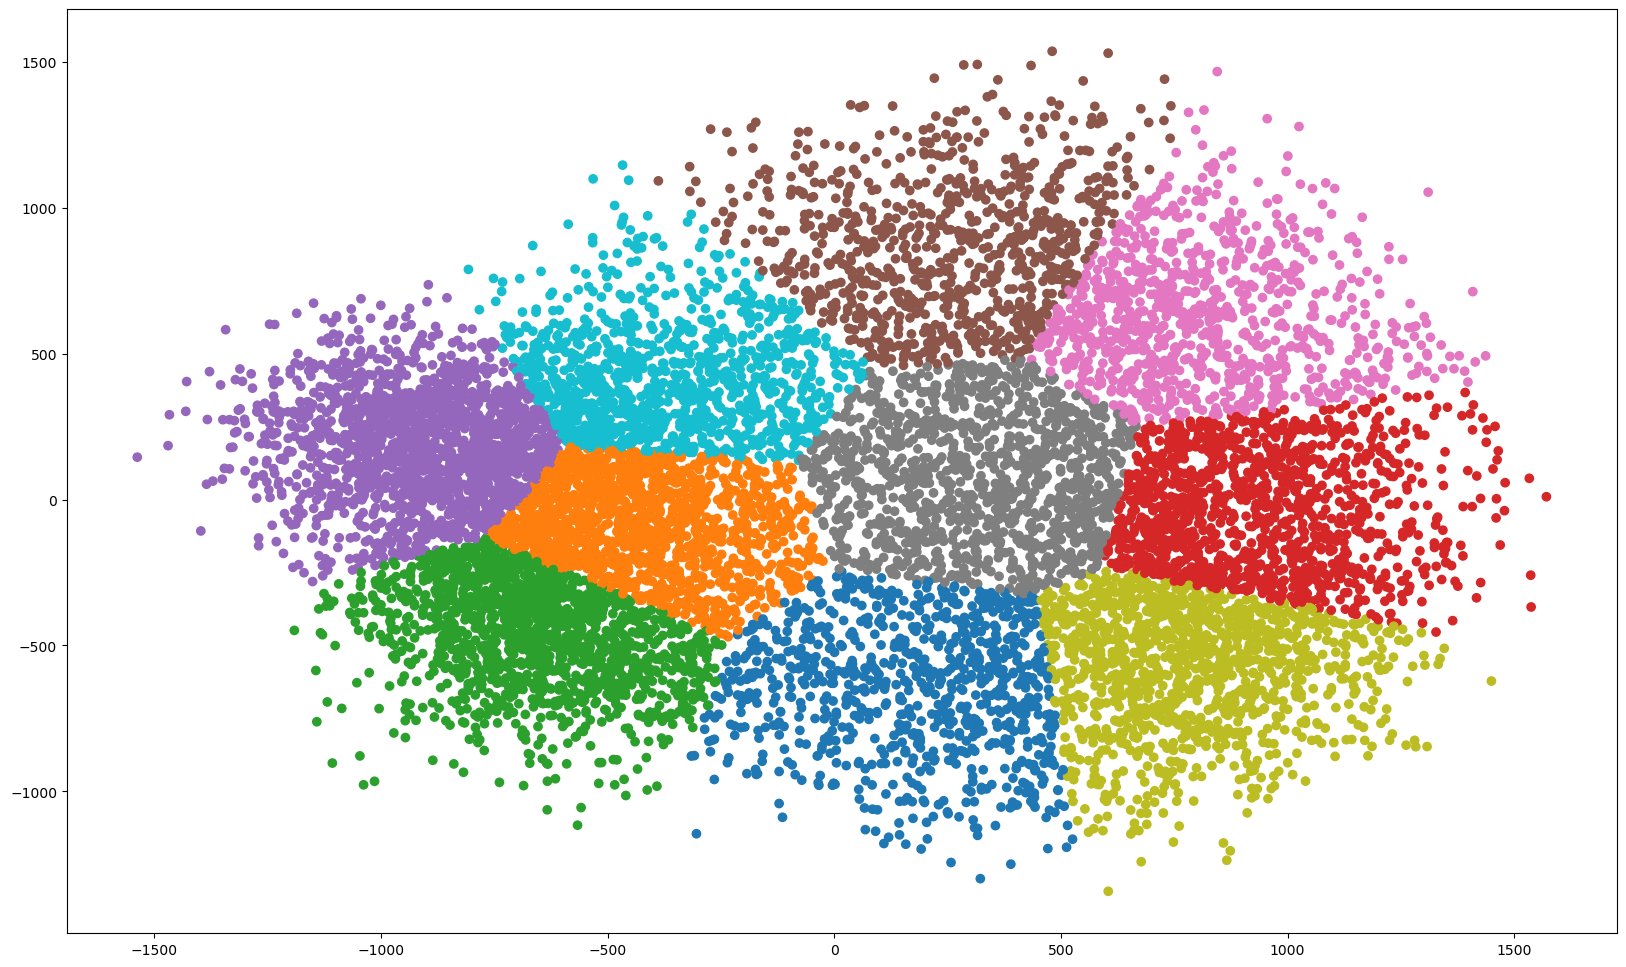

In [132]:
plt.figure(figsize=(20,12))
plt.scatter(d2[:, 0], d2[:,1], c=clusters, cmap='tab10')